## Importing all necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from encodings.aliases import aliases

## Reading in the csv file and removing duplicates

In [3]:
crime=pd.read_csv('/Users/elipraat/Library/Mobile Documents/com~apple~CloudDocs/Portfolio Projects/crime.csv',
              encoding = "ISO-8859-1")

In [4]:
crime.head() # Quick check to see how the data looks

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [5]:
crime.shape # Checking the shape of the data. It has 319,073 rows and 17 columns 

(319073, 17)

In [16]:
crime.duplicated().sum() # Counting the duplicates rows

23

In [18]:
crime.drop_duplicates(inplace=True) # Dropping the duplicate rows

In [19]:
crime.shape # Checking the shape again to see if the duplicate rows are gone

(319050, 17)

## Exploring the dataset

In [22]:
crime # A quick look at the beginning and end of the dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [23]:
crime.info() #Summary of info about the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [6]:
#Changing the data type from object to datetime for the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE=pd.to_datetime(crime.OCCURRED_ON_DATE)

In [7]:
# Checking to see if it worked
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319073 non-null  object        
 1   OFFENSE_CODE         319073 non-null  int64         
 2   OFFENSE_CODE_GROUP   319073 non-null  object        
 3   OFFENSE_DESCRIPTION  319073 non-null  object        
 4   DISTRICT             317308 non-null  object        
 5   REPORTING_AREA       319073 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319073 non-null  datetime64[ns]
 8   YEAR                 319073 non-null  int64         
 9   MONTH                319073 non-null  int64         
 10  DAY_OF_WEEK          319073 non-null  object        
 11  HOUR                 319073 non-null  int64         
 12  UCR_PART             318983 non-null  object        
 13  STREET        

In [26]:
# Now I can easily extract datetime information from the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [27]:
crime.OCCURRED_ON_DATE.dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [29]:
crime.OCCURRED_ON_DATE.dt.isocalendar().week

0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: week, Length: 319050, dtype: UInt32

In [30]:
crime.OCCURRED_ON_DATE.dt.hour

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [31]:
crime.OCCURRED_ON_DATE.dt.minute

0          0
1          0
2         27
3         16
4          5
          ..
319068    25
319069    38
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [32]:
crime.describe() # Summary of info on the numeric columns

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [34]:
crime.describe(include='object') # Summary of info on the non-numeric columns

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [35]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [37]:
#checking for columns with missing values
crime.columns[np.sum(crime.isnull())!=0]

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [38]:
#checking for columns with no missing values
crime.columns[np.sum(crime.isnull())==0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [55]:
#Checking for the number of unique values in each column
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col+" has "+str(unique_count)+" unique values ")

INCIDENT_NUMBER has 282517 unique values 
OFFENSE_CODE has 222 unique values 
OFFENSE_CODE_GROUP has 67 unique values 
OFFENSE_DESCRIPTION has 244 unique values 
DISTRICT has 12 unique values 
REPORTING_AREA has 879 unique values 
SHOOTING has 1 unique values 
OCCURRED_ON_DATE has 233229 unique values 
YEAR has 4 unique values 
MONTH has 12 unique values 
DAY_OF_WEEK has 7 unique values 
HOUR has 24 unique values 
UCR_PART has 4 unique values 
STREET has 4657 unique values 
Lat has 18178 unique values 
Long has 18178 unique values 
Location has 18194 unique values 


## Answering some questions

In [46]:
# Question 1 - What are the most common offense descriptions?
crime.OFFENSE_DESCRIPTION.value_counts()

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
LARCENY NON-ACCESSORY FROM VEH. UNDER $50          1
AUTO THEFT OTHER                                   1
B&E NON-RESIDENCE NIGHT - FORCE                    1
PROSTITUTE - COMMON NIGHTWALKER                    1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: count, Length: 244, dtype: int64

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: count, dtype: float64

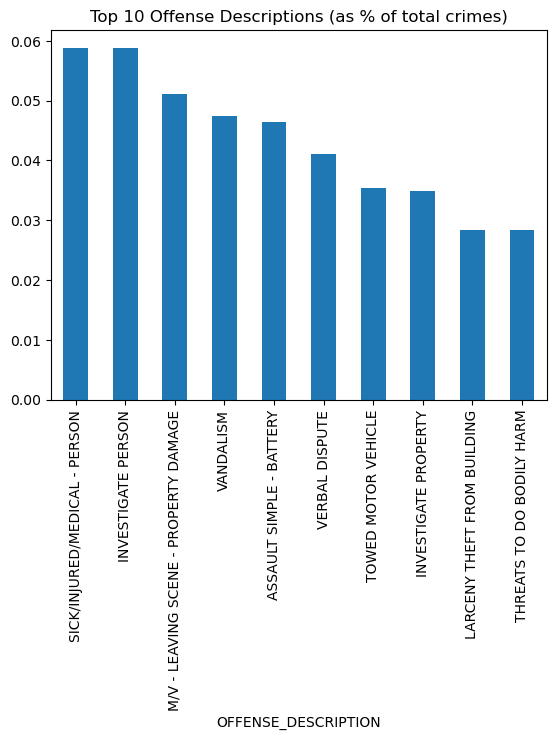

In [48]:
offense_description_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_description_vals / crime.shape[0])

# Creating a bar chart of the Top 10 offense descriptions
(offense_description_vals / crime.shape[0]).plot(kind='bar', title = 'Top 10 Offense Descriptions (as % of total crimes)');

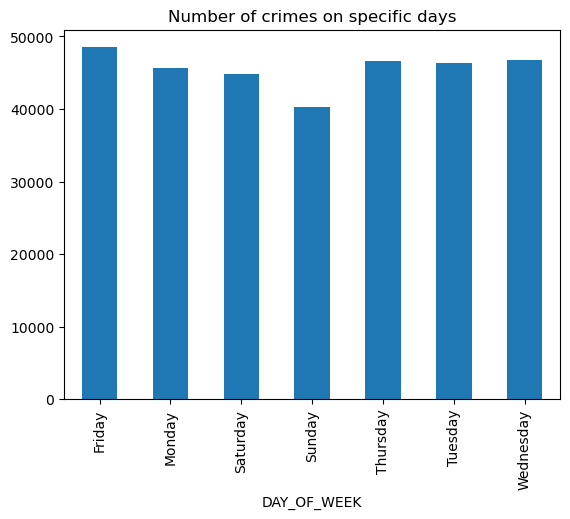

In [52]:
# Questions 2 - Are there more crimes committed on specific days of the week?
crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].plot(kind='bar', title = 'Number of crimes on specific days');

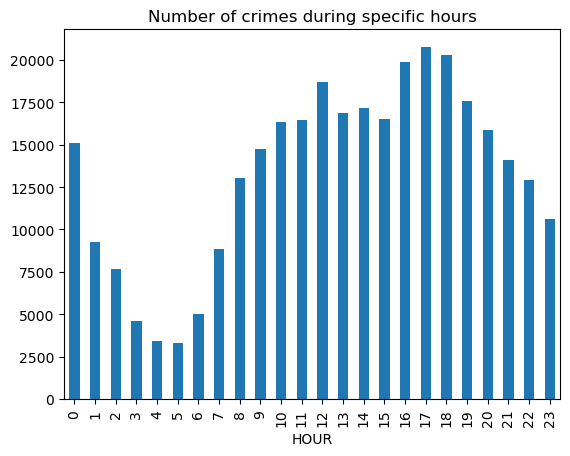

In [12]:
# Question 3 - Are there more crimes during specific hours?
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar', title = 'Number of crimes during specific hours');

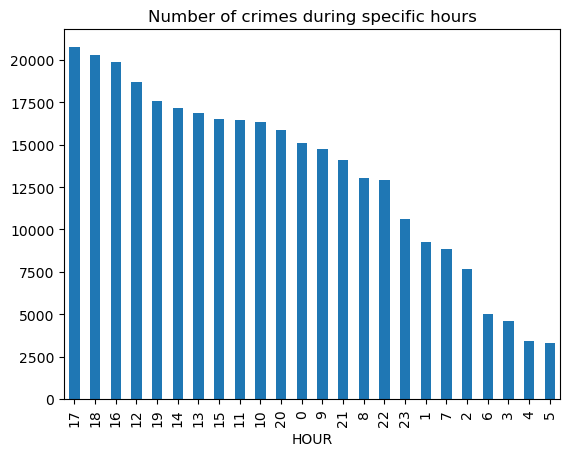

In [57]:
# Same graph as above but ordered by number of crimes
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar', title = 'Number of crimes during specific hours');

In [14]:
# Question 4 - On what days and during which hours are the most crimes committed?

week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

In [15]:
week_and_hour.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

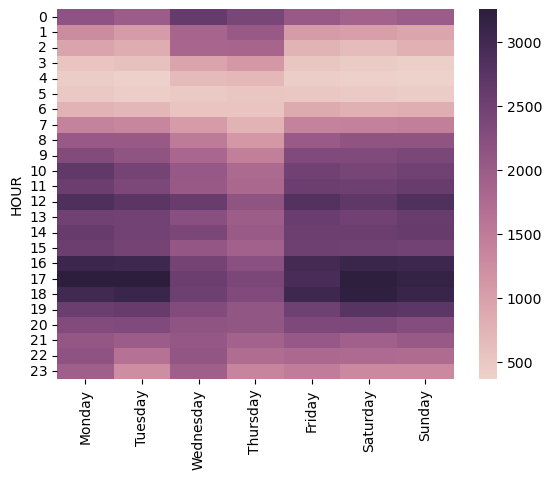

In [16]:
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True));

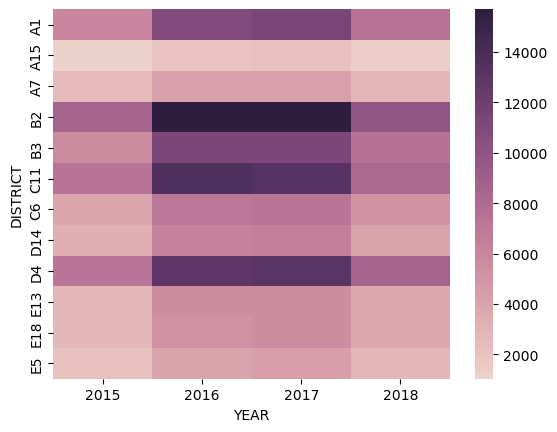

In [41]:
# Question 5 - In which districts were the most crimes committed on a yearly basis?

district_and_year = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()
sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True));

In [49]:
# I have highlighted the values that are below the average crime per district per year in blue.

avg_crime_district = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The average crime per district per year is: " + str(avg_crime_district))

def style_negative(v, props=''):
    return props if v < avg_crime_district else None
s3 = district_and_year.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s3

The average crime per district per year is: 6610.583333333333


/var/folders/8d/hhl95h290tj0g6fybw4fxy3c0000gn/T/ipykernel_12560/3140712874.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  s3 = district_and_year.style.applymap(style_negative, props='color:blue;')\
/var/folders/8d/hhl95h290tj0g6fybw4fxy3c0000gn/T/ipykernel_12560/3140712874.py:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6015,10923,11375,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8687,15706,15680,9872
B3,5617,11145,11195,7485
C11,7364,13603,13281,8282
C6,3941,7073,7247,5199
D14,3280,6279,6509,4059
D4,7204,12953,13157,8601


In [47]:
# I have highlighted the maximum value in each colummn in red

district_and_year = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s3.apply(highlight_max, props='color:white;background-color:red', axis=0)

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6015,10923,11375,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8687,15706,15680,9872
B3,5617,11145,11195,7485
C11,7364,13603,13281,8282
C6,3941,7073,7247,5199
D14,3280,6279,6509,4059
D4,7204,12953,13157,8601
